In [102]:
import pandas as pd 
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [103]:
df=pd.read_csv('D:\data\salarydata.csv')
df

,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41,PF,20,06-Oct,234,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0


In [104]:
df.columns

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'DOJ', 'Weight', 'College',
       'Salary'],
      dtype='object')

In [105]:
df.dtypes

Name         object
Team         object
Number        int64
Position     object
Age           int64
DOJ          object
Weight        int64
College      object
Salary      float64
dtype: object

In [106]:
df.drop(['Number', 'Name','DOJ'],axis=1,inplace=True)

In [107]:
df

,Team,Position,Age,Weight,College,Salary
0,Boston Celtics,PG,25,180,Texas,7730337.0
1,Boston Celtics,SF,25,235,Marquette,6796117.0
2,Boston Celtics,SG,27,205,Boston University,NaN
3,Boston Celtics,SG,22,185,Georgia State,1148640.0
4,Boston Celtics,PF,29,231,NaN,5000000.0
...,...,...,...,...,...,...
452,Utah Jazz,PF,20,234,Kentucky,2239800.0
453,Utah Jazz,PG,26,203,Butler,2433333.0
454,Utah Jazz,PG,24,179,NaN,900000.0
455,Utah Jazz,C,26,256,NaN,2900000.0


In [108]:
df.isnull()

,Team,Position,Age,Weight,College,Salary
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,True
3,False,False,False,False,False,False
4,False,False,False,False,True,False
...,...,...,...,...,...,...
452,False,False,False,False,False,False
453,False,False,False,False,False,False
454,False,False,False,False,True,False
455,False,False,False,False,True,False


In [109]:
df.isnull().sum()

Team         0
Position     0
Age          0
Weight       0
College     84
Salary      11
dtype: int64

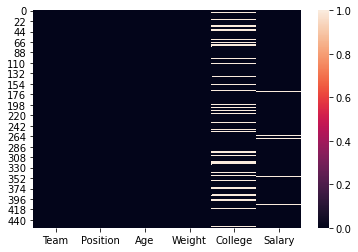

In [110]:
sns.heatmap(df.isnull())

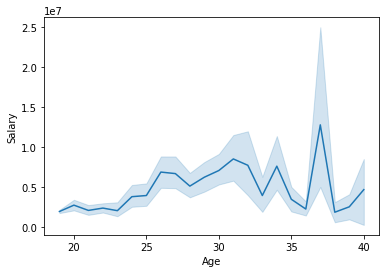

In [111]:
sns.lineplot(df['Age'],df['Salary'])

In [112]:
from sklearn.impute import SimpleImputer

In [113]:
imp=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['College']=imp.fit_transform(df['College'].values.reshape(-1,1))
df

,Team,Position,Age,Weight,College,Salary
0,Boston Celtics,PG,25,180,Texas,7730337.0
1,Boston Celtics,SF,25,235,Marquette,6796117.0
2,Boston Celtics,SG,27,205,Boston University,NaN
3,Boston Celtics,SG,22,185,Georgia State,1148640.0
4,Boston Celtics,PF,29,231,Kentucky,5000000.0
...,...,...,...,...,...,...
452,Utah Jazz,PF,20,234,Kentucky,2239800.0
453,Utah Jazz,PG,26,203,Butler,2433333.0
454,Utah Jazz,PG,24,179,Kentucky,900000.0
455,Utah Jazz,C,26,256,Kentucky,2900000.0


In [114]:
imp=SimpleImputer(missing_values=np.NaN, strategy='mean')
df['Salary']=imp.fit_transform(df['Salary'].values.reshape(-1,1))
df

,Team,Position,Age,Weight,College,Salary
0,Boston Celtics,PG,25,180,Texas,7.730337e+06
1,Boston Celtics,SF,25,235,Marquette,6.796117e+06
2,Boston Celtics,SG,27,205,Boston University,4.842684e+06
3,Boston Celtics,SG,22,185,Georgia State,1.148640e+06
4,Boston Celtics,PF,29,231,Kentucky,5.000000e+06
...,...,...,...,...,...,...
452,Utah Jazz,PF,20,234,Kentucky,2.239800e+06
453,Utah Jazz,PG,26,203,Butler,2.433333e+06
454,Utah Jazz,PG,24,179,Kentucky,9.000000e+05
455,Utah Jazz,C,26,256,Kentucky,2.900000e+06


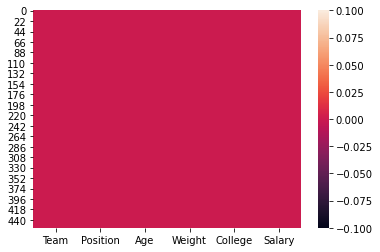

In [115]:
sns.heatmap(df.isnull())

In [116]:
x=df.iloc[:,:-1]
x

,Team,Position,Age,Weight,College
0,Boston Celtics,PG,25,180,Texas
1,Boston Celtics,SF,25,235,Marquette
2,Boston Celtics,SG,27,205,Boston University
3,Boston Celtics,SG,22,185,Georgia State
4,Boston Celtics,PF,29,231,Kentucky
...,...,...,...,...,...
452,Utah Jazz,PF,20,234,Kentucky
453,Utah Jazz,PG,26,203,Butler
454,Utah Jazz,PG,24,179,Kentucky
455,Utah Jazz,C,26,256,Kentucky


In [117]:
x=pd.DataFrame(data=x)
x

,Team,Position,Age,Weight,College
0,Boston Celtics,PG,25,180,Texas
1,Boston Celtics,SF,25,235,Marquette
2,Boston Celtics,SG,27,205,Boston University
3,Boston Celtics,SG,22,185,Georgia State
4,Boston Celtics,PF,29,231,Kentucky
...,...,...,...,...,...
452,Utah Jazz,PF,20,234,Kentucky
453,Utah Jazz,PG,26,203,Butler
454,Utah Jazz,PG,24,179,Kentucky
455,Utah Jazz,C,26,256,Kentucky


In [118]:
y=df.iloc[:,-1]
y

0      7.730337e+06
1      6.796117e+06
2      4.842684e+06
3      1.148640e+06
4      5.000000e+06
           ...     
452    2.239800e+06
453    2.433333e+06
454    9.000000e+05
455    2.900000e+06
456    9.472760e+05
Name: Salary, Length: 457, dtype: float64

In [119]:
from sklearn import preprocessing  
label_encoder = preprocessing.LabelEncoder()
for i in x.columns:
    x[i]= label_encoder.fit_transform(x[i]) 
    x[i].unique() 

In [120]:
x

,Team,Position,Age,Weight,College
0,1,2,6,8,93
1,1,3,6,55,52
2,1,4,8,27,8
3,1,4,3,11,33
4,1,1,10,51,45
...,...,...,...,...,...
452,28,1,1,54,45
453,28,2,7,26,11
454,28,2,5,7,45
455,28,0,7,74,45


In [121]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=42)

In [122]:
x_train.shape

(356, 5)

In [123]:
y_train.shape

(356,)

In [124]:
x_test.shape

(101, 5)

In [125]:
y_test.shape

(101,)

In [126]:
lm=LinearRegression()

In [127]:
lm.fit(x_train,y_train)

LinearRegression()

In [128]:
pred=lm.predict(x_test)

In [129]:
lm.score(x_train,y_train)

0.0868214649254978

In [130]:
lm.coef_

array([-21665.78040082, -45550.10395709, 306294.13206398,  26478.39751013,
         1090.63827024])

In [131]:
lm.intercept_

1709775.054580816

In [132]:
print('errors:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

errors:
Mean absolute error: 4110222.24819795
Mean squared error: 28898036394797.16
Root mean squared error: 5375689.387864329


In [137]:
print(r2_score(y_test,pred))

-0.05647371811323154


In [138]:
cross_val_score=cross_val_score(lm,x,y,cv=5,scoring='r2')

In [139]:
print(cross_val_score)

[0.08474865 0.01607271 0.03377792 0.03751697 0.01526198]


In [140]:
print(cross_val_score.mean())

0.0374756457047795


In [141]:
from sklearn.ensemble import RandomForestRegressor 

In [142]:
rf=RandomForestRegressor(n_estimators=100,random_state=42)

In [143]:
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [144]:
predrf=rf.predict(x_test)

In [145]:
rf.score(x_train,y_train)

0.8537171354424145

In [146]:
print('errors:')
print('Mean absolute error:',mean_absolute_error(y_test,predrf))
print('Mean squared error:',mean_squared_error(y_test,predrf))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,predrf)))

errors:
Mean absolute error: 4209660.745937578
Mean squared error: 29845185372338.19
Root mean squared error: 5463074.717806648


In [147]:
import joblib

In [148]:
joblib.dump(lm,'salarydata_dataset.pkl')

['salarydata_dataset.pkl']